<a href="https://colab.research.google.com/github/MagdalenaBra/ML-and-DL/blob/main/9_prediction_of_market_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Data preprocessing

Dataset: https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho

## Importing the libraries and dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataset = pd.read_csv('/content/car data.csv')

In [ ]:
dataset.head()

## Data exploration

In [5]:
dataset.shape

(301, 9)

In [6]:
dataset.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
# categorical columns
dataset.select_dtypes(include='object').columns

Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [9]:
len(dataset.select_dtypes(include='object').columns)

4

In [10]:
dataset.select_dtypes(include=['int64', 'float64']).columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner'], dtype='object')

In [11]:
len(dataset.select_dtypes(include=['int64', 'float64']).columns)

5

In [12]:
dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


## Dealing with missing values

In [13]:
dataset.isnull().values.any()

False

In [14]:
dataset.isnull().values.sum()

0

## Restructuring the dataset

In [15]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [16]:
dataset = dataset.drop(columns=['Car_Name'])

In [17]:
dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [18]:
# add a column
dataset['Current Year'] = 2020

In [19]:
dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [20]:
dataset['Years Old']= dataset['Current Year'] - dataset['Year']

In [22]:
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years Old
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [21]:
dataset = dataset.drop(columns=['Current Year', 'Year'])

In [23]:
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years Old
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


## Encoding the categorical data

In [24]:
dataset.select_dtypes(include='object').columns

Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [25]:
len(dataset.select_dtypes(include='object').columns)

3

In [26]:
dataset['Fuel_Type'].nunique()

3

In [27]:
dataset['Seller_Type'].nunique()

2

In [28]:
dataset['Transmission'].nunique()

2

In [29]:
dataset.shape

(301, 8)

In [30]:
# one hot encoding
dataset = pd.get_dummies(data=dataset, drop_first=True)

In [31]:
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [32]:
dataset.shape

(301, 9)

## Correlation matrix

In [33]:
dataset_2 = dataset.drop(columns='Selling_Price')

<Axes: title={'center': 'Correlated with selling price'}>

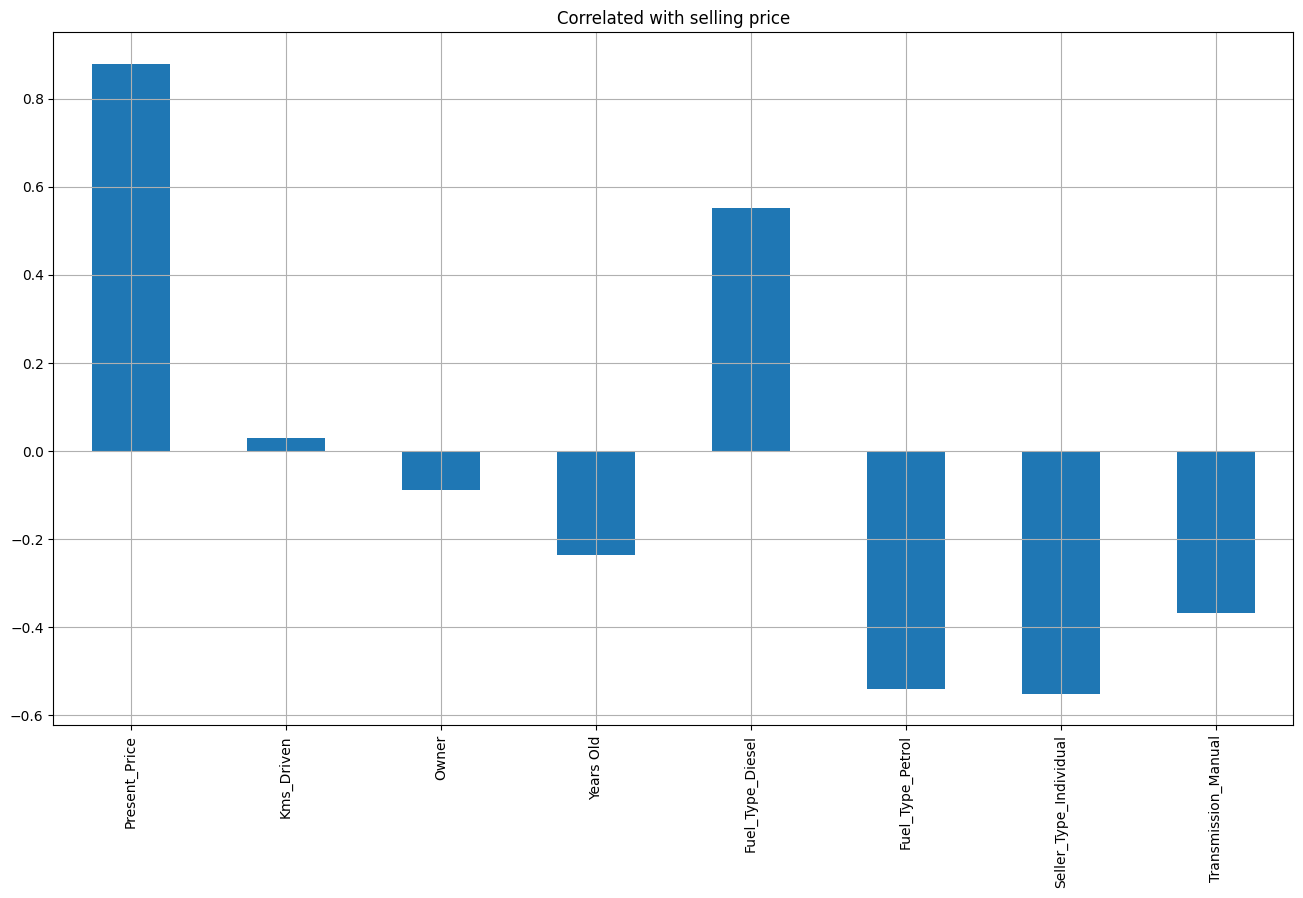

In [34]:
dataset_2.corrwith(dataset['Selling_Price']).plot.bar(
    figsize=(16,9), title='Correlated with selling price', grid=True
)

In [35]:
corr = dataset.corr()

<Axes: >

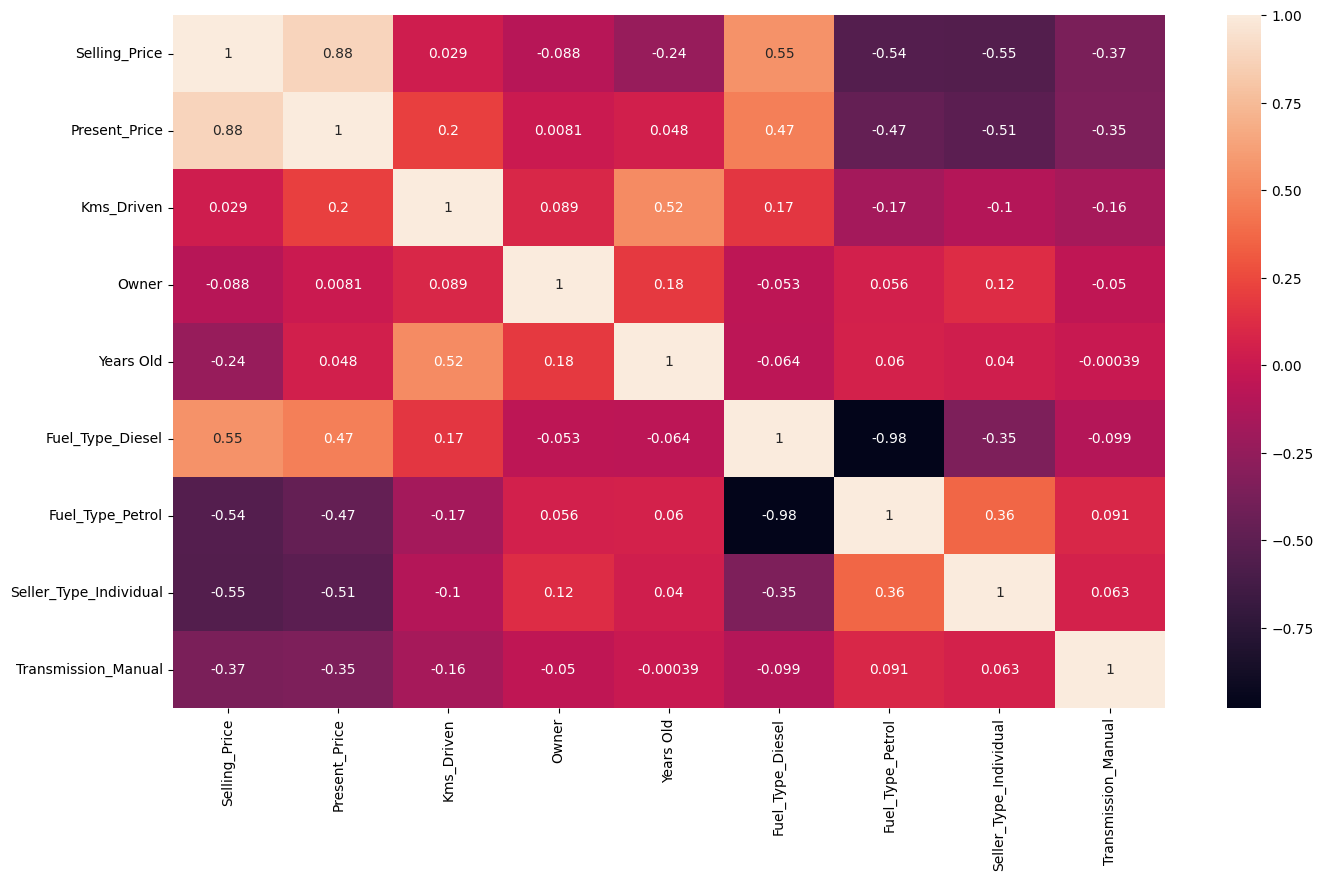

In [36]:
# heatmap
plt.figure(figsize=(16,9))
sns.heatmap(corr, annot=True)

## Splitting the dataset

In [37]:
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [38]:
# matrix of features
X = dataset.drop(columns='Selling_Price')

In [39]:
# target variable
y = dataset['Selling_Price']

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [41]:
X_train.shape

(240, 8)

In [42]:
y_train.shape

(240,)

In [51]:
X_test.shape

(61, 8)

In [53]:
y_test.shape

(61,)

# Part 2: Buliding the model

## 1 - Multiple linear regression

In [45]:
from sklearn.linear_model import LinearRegression
regressor_mlr = LinearRegression()
regressor_mlr.fit(X_train, y_train)

LinearRegression()

In [48]:
y_pred = regressor_mlr.predict(X_test)

In [49]:
from sklearn.metrics import r2_score

In [51]:
r2_score(y_test, y_pred)

0.9144342972228519

## 2- Random forest regression

In [53]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor()
regressor_rf.fit(X_train, y_train)

RandomForestRegressor()

In [54]:
y_pred = regressor_rf.predict(X_test)

In [55]:
from sklearn.metrics import r2_score

In [56]:
r2_score(y_test, y_pred)

0.9584580670923732

# Part 3: Find the optimal parameters

In [57]:
from sklearn.model_selection import RandomizedSearchCV

In [58]:
parameters = {
    'n_estimators':[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'criterion':['mse', 'mae'],
    'max_depth':[10, 20, 30, 40, 50],
    'min_samples_split':[2, 5, 10, 20, 50],
    'min_samples_leaf':[1, 2, 5, 10],
    'max_features':['auto', 'sqrt', 'log2']
}

In [59]:
random_cv = RandomizedSearchCV(estimator=regressor_rf, param_distributions=parameters, n_iter=10,
                               scoring='neg_mean_absolute_error', cv=5, verbose=2, n_jobs=-1)

In [64]:
random_cv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


ValueError: ignored

In [62]:
random_cv.best_estimator_

AttributeError: ignored

In [61]:
random_cv.best_params_

AttributeError: ignored

# Part 4: Final model - random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor( WKLEJ WYNIK BEST-ESTIMATOR)
regression_rf.fit(X_train, y_train)

In [ ]:
y_pred = regressor.rf.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2.score(y_test, y_pred)

# Part 5: Predicting a single observation

In [65]:
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [66]:
single_obs = [[8.50, 3500, 0, 5, 1, 0, 0, 1]]

In [67]:
regressor.predict(single_obs)

NameError: ignored